In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer 

Exploring data

In [5]:
names = pd.read_csv('data/categories_string.csv')['0'].to_dict()
jobs = pd.read_csv('data/train_label.csv', index_col='Id')['Category']
jobs = jobs.map(names)
jobs = jobs.rename('job')
jobs

Id
0            professor
1           accountant
2            professor
3            architect
4            architect
              ...     
217192       professor
217193    psychologist
217194       professor
217195       professor
217196           model
Name: job, Length: 217197, dtype: object

In [6]:
genders = pd.read_json('data/train.json').set_index('Id')['gender']
genders.head()

Id
0    F
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [7]:
train_df = pd.read_json("data/train.json")
train_df

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
2,2,Dr. Aster has held teaching and research posi...,M
4,3,He runs a boutique design studio attending cl...,M
5,4,"He focuses on cloud security, identity and ac...",M
...,...,...,...
271492,217192,A member of the UWA Cultural Collections Boar...,M
271493,217193,Kelly has worked globally leading teams of co...,F
271494,217194,He's the lead author of a recent study that f...,M
271495,217195,She specializes in the theoretical and pedago...,F


In [8]:
test_df = pd.read_json("data/test.json")
test_df.head()

,Id,description,gender
3,0,She currently works on CNN’s newest primetime...,F
6,1,Lavalette’s photographs have been shown widel...,M
11,2,Along with his academic and professional deve...,M
17,3,She obtained her Ph.D. in Islamic Studies at ...,F
18,4,She studies issues of women and Islam and has...,F


In [9]:
people = pd.concat((jobs, genders), axis='columns')
people.head()

,job,gender
Id,,
0,professor,F
1,accountant,M
2,professor,M
3,architect,M
4,architect,M


In [10]:
counts = people.groupby(['job', 'gender']).size().unstack('gender')
counts

gender,F,M
job,,
accountant,1129,1992
architect,1314,4527
attorney,7106,11714
chiropractor,391,1015
comedian,345,1294
composer,553,2842
dentist,1895,3555
dietitian,2120,168
dj,125,706


In [11]:
category = pd.read_csv('data/categories_string.csv')
category

,0,1
0,pastor,0
1,model,1
2,yoga_teacher,2
3,teacher,3
4,personal_trainer,4
5,painter,5
6,journalist,6
7,interior_designer,7
8,surgeon,8
9,accountant,9


In [12]:
train_df.head()

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
2,2,Dr. Aster has held teaching and research posi...,M
4,3,He runs a boutique design studio attending cl...,M
5,4,"He focuses on cloud security, identity and ac...",M


Cleaning data

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,'',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([w for w in text.split() if not w in STOPWORDS]) # delete stopwords from text
    return text

In [15]:
X_train = [text_prepare(x) for x in train_df.description]


In [16]:
X_train[:2]

['also ronald asmus policy entrepreneur fellow german marshall fund visiting fellow centre international studies cis university oxford commentary first appeared sada online journal published carnegie endowment international peace',
 'member aicpa wicpa brent graduated university wisconsin la crosse degree accountancy lived southern wisconsin entire life currently resides pardeeville wife sara three children brent sara great appreciation music art theater']

In [18]:
y_train_final = pd.DataFrame({'job_description': X_train, 'tags': jobs})
#X_train
y_train_final

,job_description,tags
Id,,
0,also ronald asmus policy entrepreneur fellow g...,professor
1,member aicpa wicpa brent graduated university ...,accountant
2,dr aster held teaching research positions ben ...,professor
3,runs boutique design studio attending clients ...,architect
4,focuses cloud security identity access managem...,architect
...,...,...
217192,member uwa cultural collections board gary chi...,professor
217193,kelly worked globally leading teams consultant...,psychologist
217194,hes lead author recent study found hospitaliza...,professor


In [ ]:
#X_test = pd.DataFrame({'job_description': X_test})
#X_test

In [19]:
y_train = pd.read_csv("data/train_label.csv")
y_train

,Id,Category
0,0,19
1,1,9
2,2,19
3,3,24
4,4,24
...,...,...
217192,217192,19
217193,217193,22
217194,217194,19
217195,217195,19


In [20]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words 
MAX_SEQUENCE_LENGTH = 130
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 286210 unique tokens.


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(X_train)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (217197, 130)


In [ ]:
train_label = pd.read_csv("data/train_label.csv")

In [22]:
Y_train = pd.get_dummies(y_train['Category']).values
print('Shape of label tensor:', Y_train.shape)

Shape of label tensor: (217197, 28)


In [23]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping


epochs = 20
batch_size = 256

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(28, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 128)          1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 130, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
Total params: 1,331,228
Trainable params: 1,331,228
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
history = model.fit(X, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20
679/679 [==============================] - 481s 708ms/step - loss: 1.7886 - accuracy: 0.5062 - val_loss: 1.1925 - val_accuracy: 0.6440
Epoch 2/20
679/679 [==============================] - 485s 714ms/step - loss: 1.1717 - accuracy: 0.6538 - val_loss: 0.9163 - val_accuracy: 0.7288
Epoch 3/20
679/679 [==============================] - 485s 715ms/step - loss: 0.9976 - accuracy: 0.7052 - val_loss: 0.8330 - val_accuracy: 0.7554
Epoch 4/20
679/679 [==============================] - 487s 717ms/step - loss: 0.9128 - accuracy: 0.7302 - val_loss: 0.7803 - val_accuracy: 0.7725
Epoch 5/20
679/679 [==============================] - 485s 714ms/step - loss: 0.8630 - accuracy: 0.7441 - val_loss: 0.7467 - val_accuracy: 0.7822
Epoch 6/20
679/679 [==============================] - 486s 716ms/step - loss: 0.8219 - accuracy: 0.7559 - val_loss: 0.7326 - val_accuracy: 0.7857
Epoch 7/20
679/679 [==============================] - 487s 717ms/step - loss: 0.7985 - accuracy: 0.7629 - val_loss: 0.7179 -

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

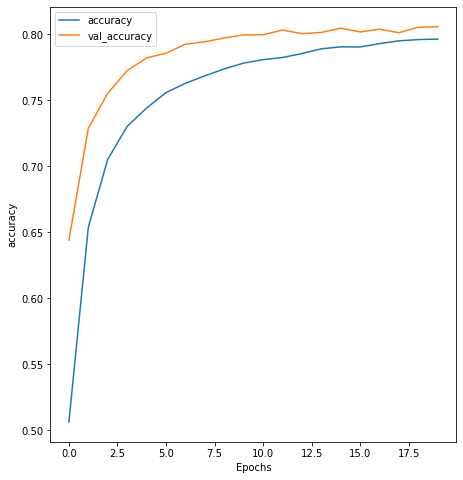

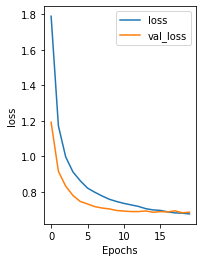

(0.0, 1.0)

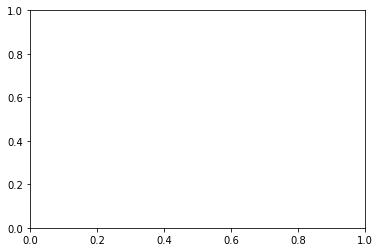

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [ ]:
X_test = [text_prepare(i) for i in test_df.description]

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
padded = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
predictions = model.predict(padded)


In [ ]:
predictions

array([[1.9414052e-05, 3.1983567e-04, 5.7064067e-04, ..., 7.9927893e-05,
        1.2335839e-03, 3.3897996e-07],
       [3.4236075e-06, 1.3961035e-04, 1.9345276e-05, ..., 5.5278183e-06,
        2.8029096e-04, 2.4897932e-07],
       [3.4697310e-03, 4.0731788e-02, 1.6759509e-02, ..., 6.6250190e-03,
        1.5397806e-01, 7.4551156e-04],
       ...,
       [2.1786918e-06, 2.0944883e-04, 1.2555005e-04, ..., 9.5845717e-06,
        1.5858019e-02, 2.4252122e-05],
       [1.2024663e-04, 1.5573532e-05, 9.9445081e-01, ..., 1.8865552e-05,
        2.0322790e-04, 4.5504393e-07],
       [1.4005570e-05, 4.1441766e-05, 2.1080716e-04, ..., 3.3432798e-06,
        1.2361093e-02, 2.8804430e-05]], dtype=float32)

In [ ]:
predictions.shape

(54300, 28)

In [ ]:
pred = np.array(labels)[np.argmax(predictions, axis=1)]

In [ ]:
pred

array(['journalist', 'dj', 'poet', ..., 'poet', 'personal_trainer',
       'paralegal'], dtype='<U17')

In [ ]:
#labels = list(set(category['0']))
#print(labels)

['surgeon', 'teacher', 'personal_trainer', 'professor', 'nurse', 'filmmaker', 'dietitian', 'comedian', 'dentist', 'pastor', 'rapper', 'journalist', 'yoga_teacher', 'composer', 'interior_designer', 'software_engineer', 'psychologist', 'architect', 'dj', 'painter', 'paralegal', 'poet', 'chiropractor', 'attorney', 'physician', 'accountant', 'photographer', 'model']


In [ ]:
test_df["Category"] = pred
baseline_file = test_df[["Id","Category"]]
baseline_file.to_csv("data/baseline.csv", index=False)